Istnieje dokładnie jeden wielomian ósmego stopnia, 
który interpoluje po-wyższe dziewięć punktów, natomiast sam wielomian może być reprezentowa-ny na różne sposoby.
Rozważamy następujące zbiory funkcji bazowychφj(t),j= 1,...,9:

φj(t) =t^j−1
φj(t) = (t−1900)^j−1
φj(t) = (t−1940)^j−1
φj(t) = ((t−1940)/40)^j−1

(a) Dla każdego z czterech zbiorów funkcji bazowych utwórz macierz Vander-monde’a.

(b) Oblicz współczynnik uwarunkowania każdej z powyższch macierzy, używa-jąc funkcjinumpy.linalg.cond.

(c) Używając najlepiej uwarunkowanej bazy wielomianów, znajdź współczyn-niki wielomianu interpolacyjnego dla danych z zadania. Narysuj wielomianinterpolacyjny. W tym celu użyj schematu Hornera i oblicz na przedziale[1900,1990] wartości wielomianu w odstępach jednorocznych. Na wykresieumieść także węzły interpolacji.

(d) Dokonaj ekstrapolacji wielomianu do roku 1990. Porównaj otrzymaną war-tość z prawdziwą wartością dla roku 1990, wynoszącą248 709 873. Ile wynosibłąd względny ekstrapolacji dla roku 1990?

(e) Wyznacz wielomian interpolacyjny Lagrange’a na podstawie 9 węzłów in-terpolacji podanych w zadaniu. Oblicz wartości wielomianu w odstępachjednorocznych.

(f) Wyznacz wielomian interpolacyjny Newtona na podstawie tych samych wę-złów interpolacji i oblicz wartości wielomianu w odstępach jednorocznych.

(g) Zaokrąglij dane podane w tabeli do jednego miliona. Na podstawie takichdanych wyznacz wielomian interpolacyjny ósmego stopnia, używając naj-lepiej uwarunkowanej bazy z podpunktu (c). Porównaj wyznaczone współ-czynniki z współczynnikami obliczonymi w podpunkcie (c). Wyjaśnij otrzy-many wynik.

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Data
years = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76212168, 92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203302031, 226542199])
population_mil = np.round(population, -6)

In [4]:
# Basic Functions
def basis_functions_1(t, j):
    return t**(j-1)

def basis_functions_2(t, j):
    return (t - 1900)**(j-1)

def basis_functions_3(t, j):
    return (t - 1940)**(j-1)

def basis_functions_4(t, j):
    return ((t - 1940)/40)**(j-1)

In [5]:
def create_vandermonde_matrix(years, basis_functions):
    n = len(years)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = basis_functions(years[i], j+1)
    return A

In [6]:
# Matrix Generation
# (1)
A1 = create_vandermonde_matrix(years, basis_functions_1)
#print("Macierz Vandermonde'a dla zbioru funkcji bazowych (1):")
#print(A1)

# (2)
A2 = create_vandermonde_matrix(years, basis_functions_2)
#print("\nMacierz Vandermonde'a dla zbioru funkcji bazowych (2):")
#print(A2)

# (3)
A3 = create_vandermonde_matrix(years, basis_functions_3)
#print("\nMacierz Vandermonde'a dla zbioru funkcji bazowych (3):")
#print(A3)

# (4)
A4 = create_vandermonde_matrix(years, basis_functions_4)
#print("\nMacierz Vandermonde'a dla zbioru funkcji bazowych (4):")
print(A4)

[[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
   1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
   1.00000000e+00]
 [ 1.00000000e+00 -7.50000000e-01  5.62500000e-01 -4.21875000e-01
   3.16406250e-01 -2.37304688e-01  1.77978516e-01 -1.33483887e-01
   1.00112915e-01]
 [ 1.00000000e+00 -5.00000000e-01  2.50000000e-01 -1.25000000e-01
   6.25000000e-02 -3.12500000e-02  1.56250000e-02 -7.81250000e-03
   3.90625000e-03]
 [ 1.00000000e+00 -2.50000000e-01  6.25000000e-02 -1.56250000e-02
   3.90625000e-03 -9.76562500e-04  2.44140625e-04 -6.10351562e-05
   1.52587891e-05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.00000000e+00  2.50000000e-01  6.25000000e-02  1.56250000e-02
   3.90625000e-03  9.76562500e-04  2.44140625e-04  6.10351562e-05
   1.52587891e-05]
 [ 1.00000000e+00  5.00000000e-01  2.50000000e-01  1.25000000e-01
   6.25000000e-02  3.1250000

In [7]:
A1_cond = np.linalg.cond(A1)
A2_cond = np.linalg.cond(A2)
A3_cond = np.linalg.cond(A3)
A4_cond = np.linalg.cond(A4)

In [8]:
print(A1_cond)
print(A2_cond)
print(A3_cond)
print(A4_cond)

1.1393798408458244e+26
6110183760727540.0
9315536046807.896
1605.4437004786923


In [9]:
coefficients = np.linalg.lstsq(A4, population, rcond=None)[0]
coefficients_mil = np.linalg.lstsq(A4, population_mil, rcond=None)[0]

In [10]:
print(coefficients)

[ 1.32164569e+08  4.61307656e+07  1.02716315e+08  1.82527130e+08
 -3.74614715e+08 -3.42668456e+08  6.06291250e+08  1.89175576e+08
 -3.15180235e+08]


In [11]:
print(coefficients_mil)

[ 1.32000000e+08  4.59571429e+07  1.00141270e+08  1.81111111e+08
 -3.56755556e+08 -3.38488889e+08  5.70311111e+08  1.86920635e+08
 -2.94196825e+08]


In [12]:
def horner_eval(coefs, x):
    n = len(coefs)
    result = coefs[-1]
    for i in range(1, n):
        result = result * x + coefs[-i-1]
    return result

In [13]:
years_interp = np.arange(1900, 1991)
population_interp1 = [horner_eval(coefficients, (year-1940)/40) for year in years_interp]
#print(population_interp1)

In [14]:
population_interp_mil = [horner_eval(coefficients_mil, (year-1940)/40) for year in years_interp]

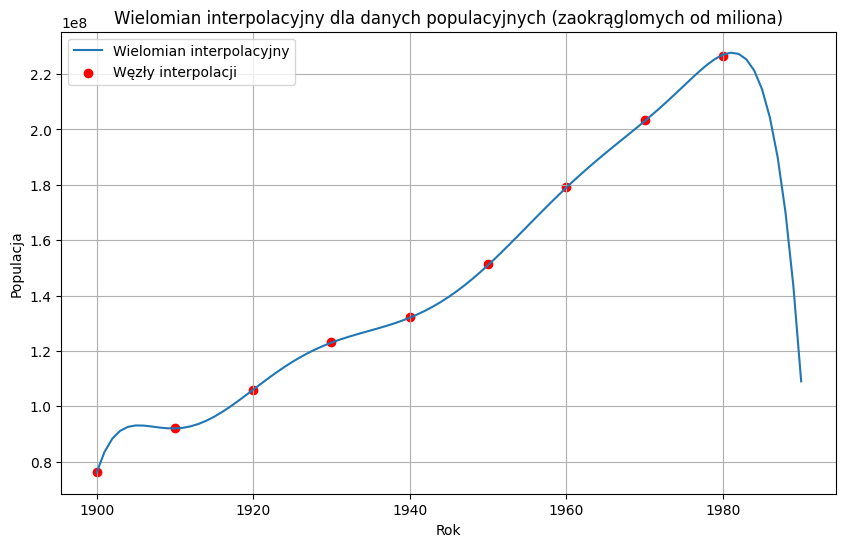

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(years_interp, population_interp_mil, label='Wielomian interpolacyjny')
plt.scatter(years, population, color='red', label='Węzły interpolacji')
plt.title('Wielomian interpolacyjny dla danych populacyjnych (zaokrąglomych od miliona)')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.legend()
plt.grid(True)
plt.show()

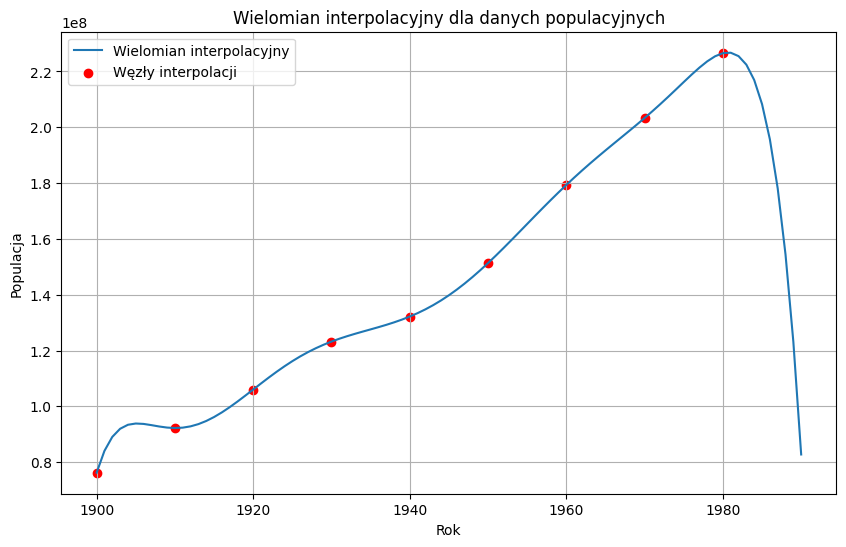

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(years_interp, population_interp1, label='Wielomian interpolacyjny')
plt.scatter(years, population, color='red', label='Węzły interpolacji')
plt.title('Wielomian interpolacyjny dla danych populacyjnych')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
real_value_1990 = 248709873

# Ekstrapolacja wielomianu do roku 1990
extrapolated_value_1990 = horner_eval(coefficients_mil, (1990-1940)/40)

# Obliczenie błędu względnego ekstrapolacji
relative_error = abs(extrapolated_value_1990 - real_value_1990) / real_value_1990 * 100

print("Wartość ekstrapolowana dla roku 1990:", extrapolated_value_1990)
print("Błąd względny ekstrapolacji dla roku 1990:", relative_error, "%")

Wartość ekstrapolowana dla roku 1990: 108999999.9999829
Błąd względny ekstrapolacji dla roku 1990: 56.17383472348808 %


In [24]:
real_value_1990 = 248709873

# Ekstrapolacja wielomianu do roku 1990
extrapolated_value_1990 = horner_eval(coefficients, (1990-1940)/40)

# Obliczenie błędu względnego ekstrapolacji
relative_error = abs(extrapolated_value_1990 - real_value_1990) / real_value_1990 * 100

print("Wartość ekstrapolowana dla roku 1990:", extrapolated_value_1990)
print("Błąd względny ekstrapolacji dla roku 1990:", relative_error, "%")

Wartość ekstrapolowana dla roku 1990: 82749140.99998184
Błąd względny ekstrapolacji dla roku 1990: 66.72864651417282 %


In [18]:
def lagrange_interpolation(x, x_values, y_values):
    n = len(x_values)
    result = 0
    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if j != i:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term
    return result

In [19]:
population_interp2 = lagrange_interpolation(years_interp, years, population)

In [20]:
print((real_value_1990 - population_interp2[90])/real_value_1990 * 100)

66.72864651416705


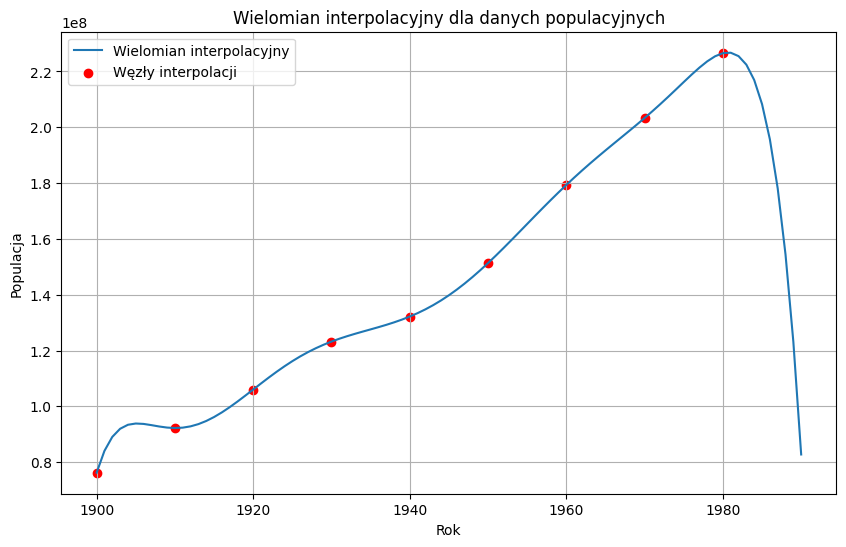

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(years_interp, population_interp2, label='Wielomian interpolacyjny')
plt.scatter(years, population, color='red', label='Węzły interpolacji')
plt.title('Wielomian interpolacyjny dla danych populacyjnych')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
def divided_differences(x_values, y_values):
    n = len(x_values)
    F = np.zeros((n, n))
    F[:,0] = y_values
    for j in range(1,n):
        for i in range(n-j):
            F[i,j] = (F[i+1,j-1] - F[i,j-1]) / (x_values[i+j] - x_values[i])
    return F

def newton_interpolation(x, x_values, F):
    n = len(x_values)
    result = F[0,0]
    for i in range(1,n):
        term = F[0,i]
        for j in range(i):
            term *= (x - x_values[j])
        result += term
    return result

In [27]:
F = divided_differences(years, population)

population_interp3 = [newton_interpolation(year, years, F) for year in years_interp]

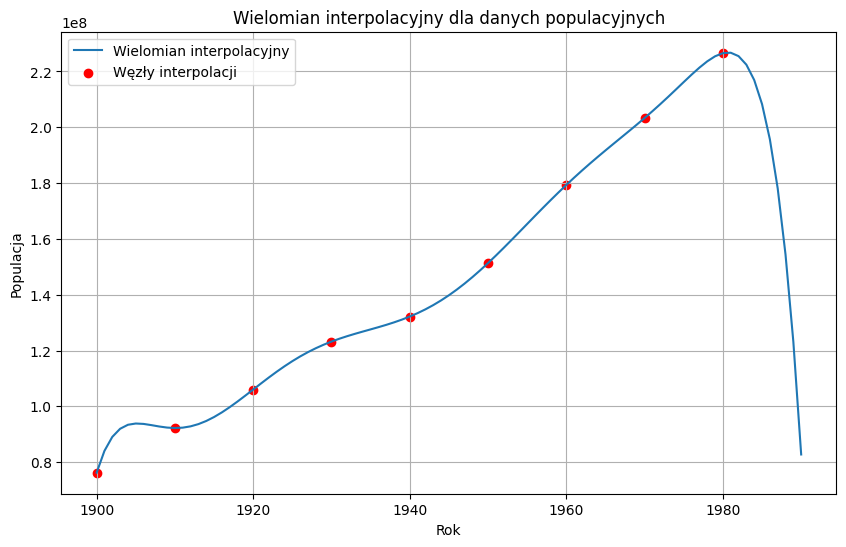

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(years_interp, population_interp3, label='Wielomian interpolacyjny')
plt.scatter(years, population, color='red', label='Węzły interpolacji')
plt.title('Wielomian interpolacyjny dla danych populacyjnych')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.legend()
plt.grid(True)
plt.show()

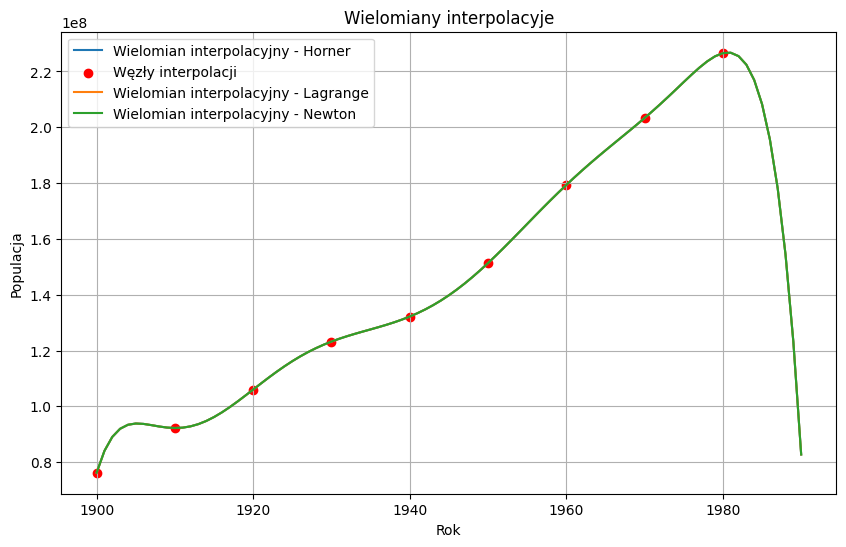

In [32]:
# Wykresy zbiorczo
plt.figure(figsize=(10, 6))
plt.plot(years_interp, population_interp1, label='Wielomian interpolacyjny - Horner')
plt.scatter(years, population, color='red', label='Węzły interpolacji')
plt.plot(years_interp, population_interp2, label='Wielomian interpolacyjny - Lagrange')
plt.plot(years_interp, population_interp3, label='Wielomian interpolacyjny - Newton')


plt.title('Wielomiany interpolacyje')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.legend()
plt.grid(True)
plt.show()